## Práctica Propuesta- SimPy SED

Modifique el código anterior a fin de incorporar los siguientes cambios:

* Considerar 3 tipos de vehículos con 3 diferentes tiempos de lavado:
    * Bus: 15- 20 minutos
    * Automóvil: 7-10 minutos
    * Furgoneta: 12-15 minutos
* Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:
    * Bus: 4 minutos
    * Automóvil: 1 minuto
    * Furgoneta: 2 minutos
* Identificar el recurso maquina dentro de la simulación
* Realice una gráfica comparativa de la simulación con 3 y con 4 máquinas de lavado
* Generar llegada de vehiculos de 1 - 2 minutos, por 60 minutos de lavado.

In [28]:
import simpy
import random
import matplotlib.pyplot as plt

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
# Esto permite graficar o generar los resultados
tiempo={}
nMaquina=[0,0,0]

class Lavanderia(object):
    
    def __init__(self, environment, num_maquinas, tiempo_lavado):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las maquinas
        self.maquinas = simpy.Resource(environment, num_maquinas)
        # Variable para el tiempo de lavado
        self.tiempo_lavado = tiempo_lavado
        
    def lavar_vehiculo(self, vehiculo):
        # Este metodo representa el proceso de lavado del vehículo.
        # Se ingresa el vehículo y se lava
        
        # Simulamos el tiempo que tarda en lavarse el vehiculo
        # Es importante notar que la instruccion "yield" es distinta de "sleep"
        # ya que esta ultima bloquea el hilo de ejecucion durante 't' unidades de tiempo,
        # mientras que 'yield' no bloquea el hilo de ejecucion, solo lo suspende mientras
        # el evento de 'lavado' se realice

        # ---> Modificamos el tiempo de lavado 5-11
        vehiculo=vehiculo.split(' ')[0]
        if vehiculo == 'Bus':
            yield self.env.timeout(random.randint(15,20))
        elif vehiculo == 'Automovil':
            yield self.env.timeout(random.randint(7,10))
        elif vehiculo == 'Furgoneta':
            yield self.env.timeout(random.randint(12,15))
        
        # Simulamos que se ha limpiado parte (%) de la suciedad del vehiculo
        # Para el % generamos un entero entre 30 y 90
        print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30,90), vehiculo))
        
        
    
def llegada_vehiculo(env, nombre, lavanderia):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    global nMaquina
    print('Llega vehiculo: %s a la hora %.2f.' % (nombre, env.now))
    
    # Especificamos que vamos a usar un recurso (Resource) que representa
    # la maquina de lavado
    with lavanderia.maquinas.request() as maquina:
        # Ocupamos la maquina de lavado
        # print(maquina)
        yield maquina
        nM=0
        for i in range(len(nMaquina)):
            if nMaquina[i] == 0:
                nM=i+1
                nMaquina[i] = str(maquina)
                break
        # Indicamos que vehiculo entra a la lavanderia
        vehiculo=nombre.split(' ')[0]

        if vehiculo == 'Bus':
            yield env.timeout(4)
        elif vehiculo == 'Automovil':
            yield env.timeout(1)
        elif vehiculo == 'Furgoneta':
            yield env.timeout(2)
        
        print('Entra vehiculo ',nombre,' entra a lavarse en la maquina:',nM,' a la hora',env.now)
        # Procesamos la operacion de lavado
        yield env.process(lavanderia.lavar_vehiculo(nombre))
        nMaquina[nM-1]=0
        # Una vez que termina la llamada con 'yield', se indica que se ha lavado el vehiculo
        print('Vehiculo [%s] lavado a las %.2f.' % (nombre, env.now))
        # --> Agegamos al diccionario para obtener los tiempos de lavado
        k=env.now # Permite obtener el tiempo actual de la simulación para generar la clave del diccionario
    if k in tiempo:
        tiempo[k]=tiempo[k]+1 # Aumento el numero de autos en el tiempo de salida
    else:
        tiempo[k]=1 # Por defecto empezamos con el primer vehiculo

def ejecutar_simulacion(env, num_maquinas, tiempo_lavado, intervalo):
    lavanderia=Lavanderia(env, num_maquinas, tiempo_lavado)
    # Creamos 5 llegadas de vehiculos iniciales
    v={"Bus":0, "Automovil":0, "Furgoneta":0}
    for i in range(5):
        veichulo = random.choice(["Bus", "Automovil", "Furgoneta"])
        v[veichulo]+=1
        env.process(llegada_vehiculo(env, str(veichulo+' '+str(v[veichulo])),lavanderia))
        # print(v)
    
    # Ejecutamos la simulacion
    while True:
        # yield env.timeout(random.randint(intervalo-3, intervalo+3))
        yield env.timeout(random.randint(1,2))
        # Mientras se lavan los vehiculos generamos mas vehiculos
        veichulo = random.choice(["Bus", "Automovil", "Furgoneta"])
        v[veichulo]+=1
        env.process(llegada_vehiculo(env, str(veichulo+' '+str(v[veichulo])),lavanderia))


Simulacion con 3 maquinas de lavado

Lavanderia UPS
Llega vehiculo: Automovil 1 a la hora 0.00.
Llega vehiculo: Automovil 2 a la hora 0.00.
Llega vehiculo: Bus 1 a la hora 0.00.
Llega vehiculo: Bus 2 a la hora 0.00.
Llega vehiculo: Bus 3 a la hora 0.00.
Llega vehiculo: Automovil 3 a la hora 1.00.
Entra vehiculo  Automovil 1  entra a lavarse en la maquina: 1  a la hora 1
Entra vehiculo  Automovil 2  entra a lavarse en la maquina: 2  a la hora 1
Llega vehiculo: Furgoneta 1 a la hora 3.00.
Entra vehiculo  Bus 1  entra a lavarse en la maquina: 3  a la hora 4
Llega vehiculo: Bus 4 a la hora 4.00.
Llega vehiculo: Bus 5 a la hora 6.00.
Llega vehiculo: Furgoneta 2 a la hora 7.00.
Removido  {41%} suciedad vehiculo => Automovil 
Removido  {51%} suciedad vehiculo => Automovil 
Llega vehiculo: Automovil 4 a la hora 9.00.
Vehiculo [Automovil 1] lavado a las 9.00.
Vehiculo [Automovil 2] lavado a las 9.00.
Llega vehiculo: Bus 6 a la hora 10.00.
Llega vehiculo: Furgoneta 3 a la hora 12.00.
Entra vehiculo  Bus 2  entra a lavarse en la maq

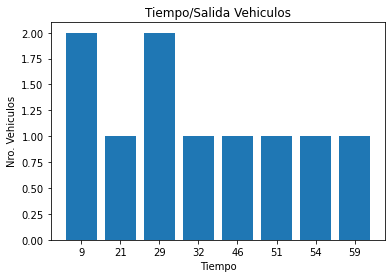

In [29]:
%matplotlib inline

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 3
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = 20
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 9
# Tiempo de simulación
TIEMPO_SIMULACION = 60


print('Lavanderia UPS')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

print(tiempo)
# Generamos una grafica en base al diccionario del tiempo
etiqueta = list(tiempo.keys())
valores = list(tiempo.values())
plt.bar(range(len(tiempo)), valores, align="center", tick_label=etiqueta)
plt.title("Tiempo/Salida Vehiculos")
plt.xlabel("Tiempo")
plt.ylabel("Nro. Vehiculos")
plt.show()

Simulacion con 4 maquinas de lavado

Lavanderia UPS
Llega vehiculo: Automovil 1 a la hora 0.00.
Llega vehiculo: Automovil 2 a la hora 0.00.
Llega vehiculo: Bus 1 a la hora 0.00.
Llega vehiculo: Bus 2 a la hora 0.00.
Llega vehiculo: Bus 3 a la hora 0.00.
Llega vehiculo: Automovil 3 a la hora 1.00.
Entra vehiculo  Automovil 1  entra a lavarse en la maquina: 0  a la hora 1
Entra vehiculo  Automovil 2  entra a lavarse en la maquina: 0  a la hora 1
Llega vehiculo: Furgoneta 1 a la hora 3.00.
Entra vehiculo  Bus 1  entra a lavarse en la maquina: 0  a la hora 4
Entra vehiculo  Bus 2  entra a lavarse en la maquina: 0  a la hora 4
Llega vehiculo: Automovil 4 a la hora 4.00.
Llega vehiculo: Bus 4 a la hora 5.00.
Llega vehiculo: Bus 5 a la hora 7.00.
Removido  {50%} suciedad vehiculo => Automovil 
Removido  {37%} suciedad vehiculo => Automovil 
Llega vehiculo: Bus 6 a la hora 9.00.
Vehiculo [Automovil 1] lavado a las 9.00.
Vehiculo [Automovil 2] lavado a las 9.00.
Entra vehiculo  Automovil 3  entra a lavarse en la maquina: 0  a la h

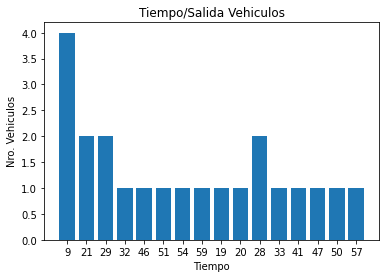

In [30]:
%matplotlib inline

# Maximo de vehiculos que puede recibir el negocio
MAX_VEHICULOS = 57 
# Total de maquinas de lavado con que cuenta el negocio
NUM_MAQUINAS = 4
# Tiempo que tarda en lavarse un vehiculo (minutos)
TIEMPO_LAVADO = 20
# Intervalo de tiempo en que llegan vehiculos (minutos)
INTERVALO_LLEGADA = 9
# Tiempo de simulación
TIEMPO_SIMULACION = 60


print('Lavanderia UPS')
# Inicializamos la semilla aleatoria
random.seed(77)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env, NUM_MAQUINAS, TIEMPO_LAVADO, INTERVALO_LLEGADA))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

print(tiempo)
# Generamos una grafica en base al diccionario del tiempo
etiqueta = list(tiempo.keys())
valores = list(tiempo.values())
plt.bar(range(len(tiempo)), valores, align="center", tick_label=etiqueta)
plt.title("Tiempo/Salida Vehiculos")
plt.xlabel("Tiempo")
plt.ylabel("Nro. Vehiculos")
plt.show()